In [2]:
    import pandas as pd   
    import numpy as np  
    import matplotlib.pyplot as plt
    import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [64]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv') 
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN


In [21]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2020  1970.560169              NaN
1        Afghanistan  2019  2065.036235              NaN
2        Afghanistan  2018  2033.804389              NaN
3        Afghanistan  2017  2058.400221              NaN
4        Afghanistan  2016  2057.067978              NaN
...              ...   ...          ...              ...
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN

[7176 rows x 4 columns]


5. How many rows and columns are in `gdp_df`? Answer= 7176 rows x 4 columns What are the data types of each column? Country or Area(text), Year(numeric) , Value(float), Value(blank) Footnotes (NaN)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [71]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
gdp_df=gdp_df.drop(columns=['Value Footnotes'])
print(gdp_df)

KeyError: "['Value Footnotes'] not found in axis"

In [127]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
print (gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? (2) Count the NaN under a single DataFrame column: df['your column name'].isnull().sum()df.isnull().values.any() dataframe[dataframe[‘column_name’].isin(list_of_strings)]employee.groupby(['DEPT','GENDER'],as_index=False)
gdp_df.groupby(["Country"])["Year"].count()

In [119]:
group1=gdp_df.groupby(['Country'])['Year'].count()
print(group1)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


In [126]:
group2=gdp_df.groupby(['Year']) ['Country'].count()
print(group2)

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?plt.hist(df['Age'])


(array([4.903e+03, 9.580e+02, 8.230e+02, 2.780e+02, 1.060e+02, 5.900e+01,
        3.200e+01, 1.200e+01, 2.000e+00, 3.000e+00]),
 array([   436.72037105,  16590.19480005,  32743.66922904,  48897.14365804,
         65050.61808704,  81204.09251604,  97357.56694503, 113511.04137403,
        129664.51580303, 145817.99023202, 161971.46466102]),
 <BarContainer object of 10 artists>)

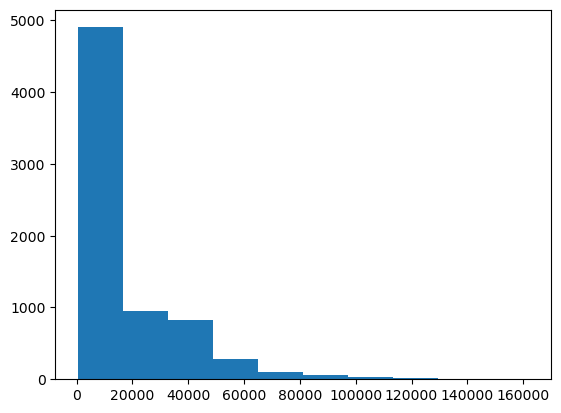

In [137]:
plt.hist(gdp_df['GDP_Per_Capita'])

a density plot

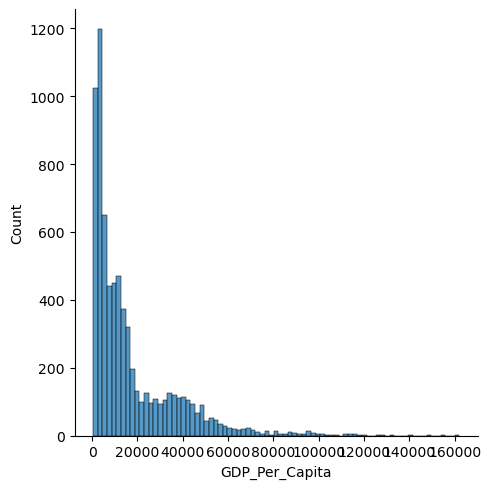

In [142]:
sns.displot(gdp_df['GDP_Per_Capita'])

boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x280d8f5cd00>,
 'caps': [<matplotlib.lines.Line2D at 0x280d8f5d240>,
 'boxes': [<matplotlib.lines.Line2D at 0x280d8f5ca60>],
 'medians': [<matplotlib.lines.Line2D at 0x280d8f5d780>],
 'fliers': [<matplotlib.lines.Line2D at 0x280d8f5da20>],
 'means': []}

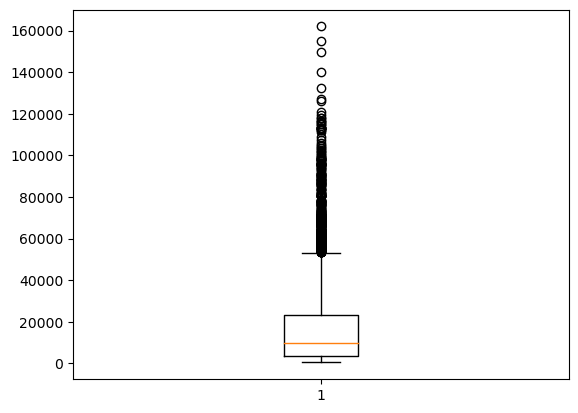

In [146]:
plt.boxplot(gdp_df['GDP_Per_Capita'])

violin plot